<a href="https://colab.research.google.com/github/cullena20/inspiritai/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classifier


In [ ]:
import tensorflow as tf
from tensorflow import keras  # perhaps this wasn't the cleanest way
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## Data Exploration


Load our data and explore it a little.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# labels were already converted to numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Every pixel in the image is a value from 0 to 255. We normalize the features (putting to a 0 to 1 range) by dividing by 255.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

There are 60,000 training images and 10,000 testing images. Each image is 28 * 28 pixels (note not rgb)

In [ ]:
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print("Test Images:", test_images.shape)
print("Test Labels:", test_labels.shape)

Train Images: (60000, 28, 28)
Train Labels: (60000,)
Test Images: (10000, 28, 28)
Test Labels: (10000,)


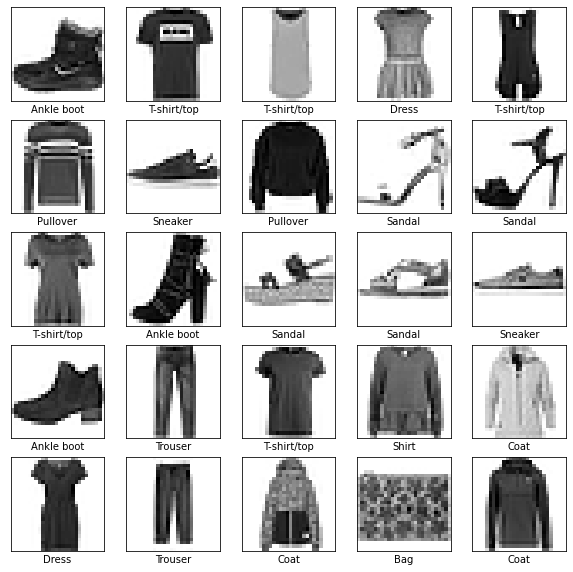

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

5 Sandal


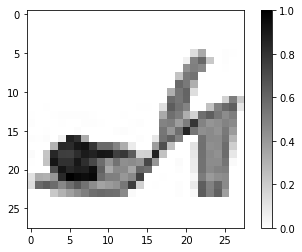

In [ ]:
import random
inx = random.randint(0, 59999)
label = train_labels[inx]
plt.imshow(train_images[inx], cmap=plt.cm.binary) # can put in cmap=plt.cm.binary to get black and white images
plt.colorbar()
print(label, class_names[label])
plt.show()

## Building The Model

We will build and evaluate a very simple artificial nueral network. There is different syntax to do this, but I went with the way in the tensforflow website.


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') # tf website put softmax seperate.
])
# note
# logits are produced in the final layer and are to be inputted in the softmax function
# tf website put softmax function seperatley for probability (softmax returns probability)

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # i need to understand what logits are
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


There is a lot to examine as the model trains. What can you notice?

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6528 - accuracy: 0.7742 - val_loss: 0.4164 - val_accuracy: 0.8497
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4031 - accuracy: 0.8562 - val_loss: 0.4128 - val_accuracy: 0.8561
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3532 - accuracy: 0.8720 - val_loss: 0.3468 - val_accuracy: 0.8752
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3224 - accuracy: 0.8808 - val_loss: 0.3565 - val_accuracy: 0.8724
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3069 - accuracy: 0.8884 - val_loss: 0.3480 - val_accuracy: 0.8712


In [ ]:
test_acc, test_loss = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3709 - accuracy: 0.8662


You can notice the accuracy of the training data, validation accuracy, and below the testing data. You can also note the losses. You can observe how this changes as we train the model.

Now let's try a CNN!

In [ ]:
cnn = keras.Sequential([
  keras.layers.Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Conv2D(16, (3, 3), activation='relu'),
  keras.layers.Dropout(0.4),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer=keras.optimizers.SGD(momentum=0.95),
            loss=keras.losses.SparseCategoricalCrossentropy,
            metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
cnn_history = model.fit(train_images, train_labels, validation_split=0.2, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.8957 - val_loss: 0.3321 - val_accuracy: 0.8796
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2725 - accuracy: 0.9000 - val_loss: 0.3210 - val_accuracy: 0.8860
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2611 - accuracy: 0.9033 - val_loss: 0.3280 - val_accuracy: 0.8831
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2506 - accuracy: 0.9068 - val_loss: 0.3258 - val_accuracy: 0.8842
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2404 - accuracy: 0.9087 - val_loss: 0.3091 - val_accuracy: 0.8894


In [ ]:
cnn_test_acc, test_loss = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3366 - accuracy: 0.8822


Again you can examine the performance of this model. The CNN I designed did not do much better than the simple ANN.

## Evaluating The Model

We can examine the predictions that our model gave us. It outputs an array of 10 integers (one for each label), each representing a probability. The softmax activation gave us this.

In [ ]:
preds = model.predict(test_images)
preds[0]

array([2.2199890e-06, 1.1619421e-08, 2.2868197e-07, 4.0214490e-10,
       8.9217110e-08, 1.2822894e-03, 1.8857853e-07, 9.2181927e-03,
       1.1567540e-05, 9.8948520e-01], dtype=float32)

The below code allows us to examine our models predictions. We can see some interesting things here. What observations can you make? Where does our model do well? Where does it fall behind?

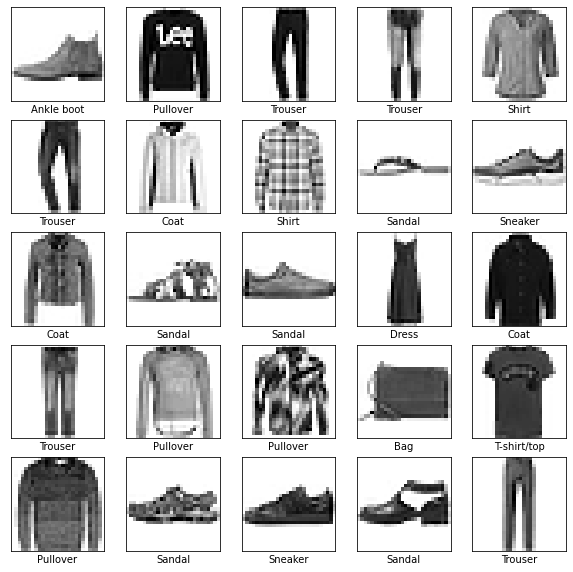

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    label = test_labels[i]
    pred = np.argmax(preds[i])
    pred_prob = np.max(preds[i])
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[pred])
    # plt.xlabel("{:2.0%}% of being {}".format(pred_prob, class_names[pred]))
plt.show()

Prediction: Sandal Probability:  0.9999999
Actual Label: Sandal


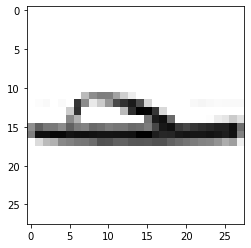

In [ ]:
inx = random.randint(0, 9999)
label = test_labels[inx]
pred = np.argmax(preds[inx])  # np.argmax returns the index of the max
pred_prob = np.max(preds[inx])  # np.max returns the max value
print("Prediction:", class_names[pred], "Probability: ", pred_prob)
print("Actual Label:", class_names[label])
plt.imshow(test_images[inx], cmap=plt.cm.binary)
plt.show()

Notice how our model generally does very well. It struggles with more ambiguous images.

## Additional Things

*  Understand how to use matplot lib better and make some things here to better visualize data and results (subplots and all of that.
*  Make more projects with Tf/Keras and get a better feel for doing this myself. This was a great start after Inspirit AI. A lot more to come.
*  Learn more specifics about loss, activation, all that jazz.
